In [5]:
import pandas  as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.shape

(200, 5)

In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

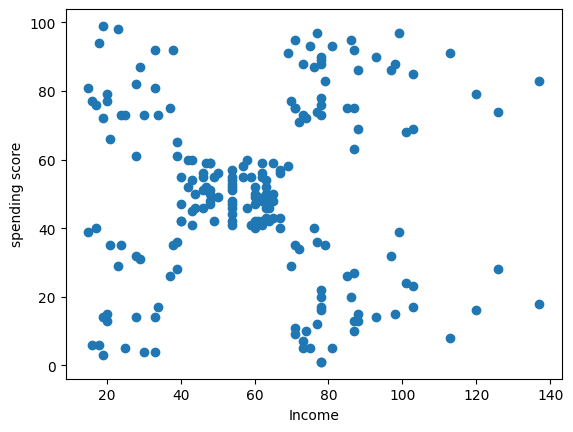

In [9]:
plt.scatter(x[...,0], x[...,1])
plt.xlabel('Income')
plt.ylabel('spending score')
plt.show()

In [10]:
import numpy as np

def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

def region_query(x, point_idx, eps):
    neighbors = []
    for i in range(len(x)):
        if euclidean_dist(x[point_idx], x[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(x, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(x, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == 0:  # unvisited
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = region_query(x, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_samples:
                    for n in neighbor_neighbors:
                        if n not in neighbors:
                            neighbors.append(n)
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id  # change noise to border point
            i += 1
        return True

def dbscan_manual(x, eps, min_samples):
    labels = np.zeros(len(x), dtype=int)  # 0 means unvisited
    cluster_id = 0

    for point_idx in range(len(x)):
        if labels[point_idx] != 0:
            continue
        if expand_cluster(x, labels, point_idx, cluster_id + 1, eps, min_samples):
            cluster_id += 1
    return labels
labels = dbscan_manual(x, eps=20, min_samples=20)
print(labels)


[ 1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1]


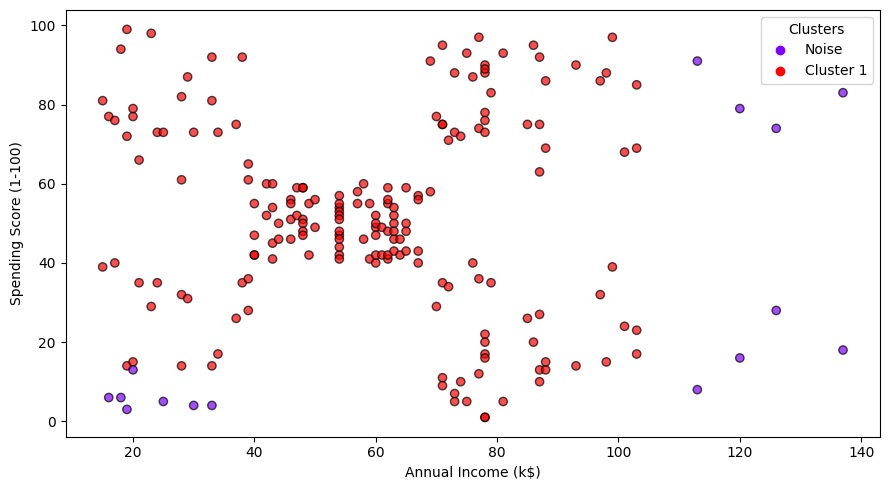

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# x[:, 0] → Annual Income
# x[:, 1] → Spending Score
# labels → predicted clusters or class labels

plt.figure(figsize=(9, 5))
scatter = plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='k')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# plt.title("Customer Segmentation")

# Optional: Label 'minority' class as 'Noise'
# Replace `minority_class_label` with the actual value (e.g., -1 if it's from DBSCAN or a rare class)
minority_class_label = -1  # update this based on your data
unique_labels = np.unique(labels)

# Create a legend with label names
legend_labels = []
for ul in unique_labels:
    label_name = "Noise" if ul == minority_class_label else f"Cluster {ul}"
    legend_labels.append(label_name)

# Create legend
handles = [plt.Line2D([], [], marker='o', linestyle='', color=scatter.cmap(scatter.norm(i)))
           for i in unique_labels]
plt.legend(handles, legend_labels, title="Clusters", loc="best")

plt.tight_layout()
plt.show()
